<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/LG_AI_training/M1_Proces_Innovationby_ML/Practice/Practice_1_Process_Mining_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

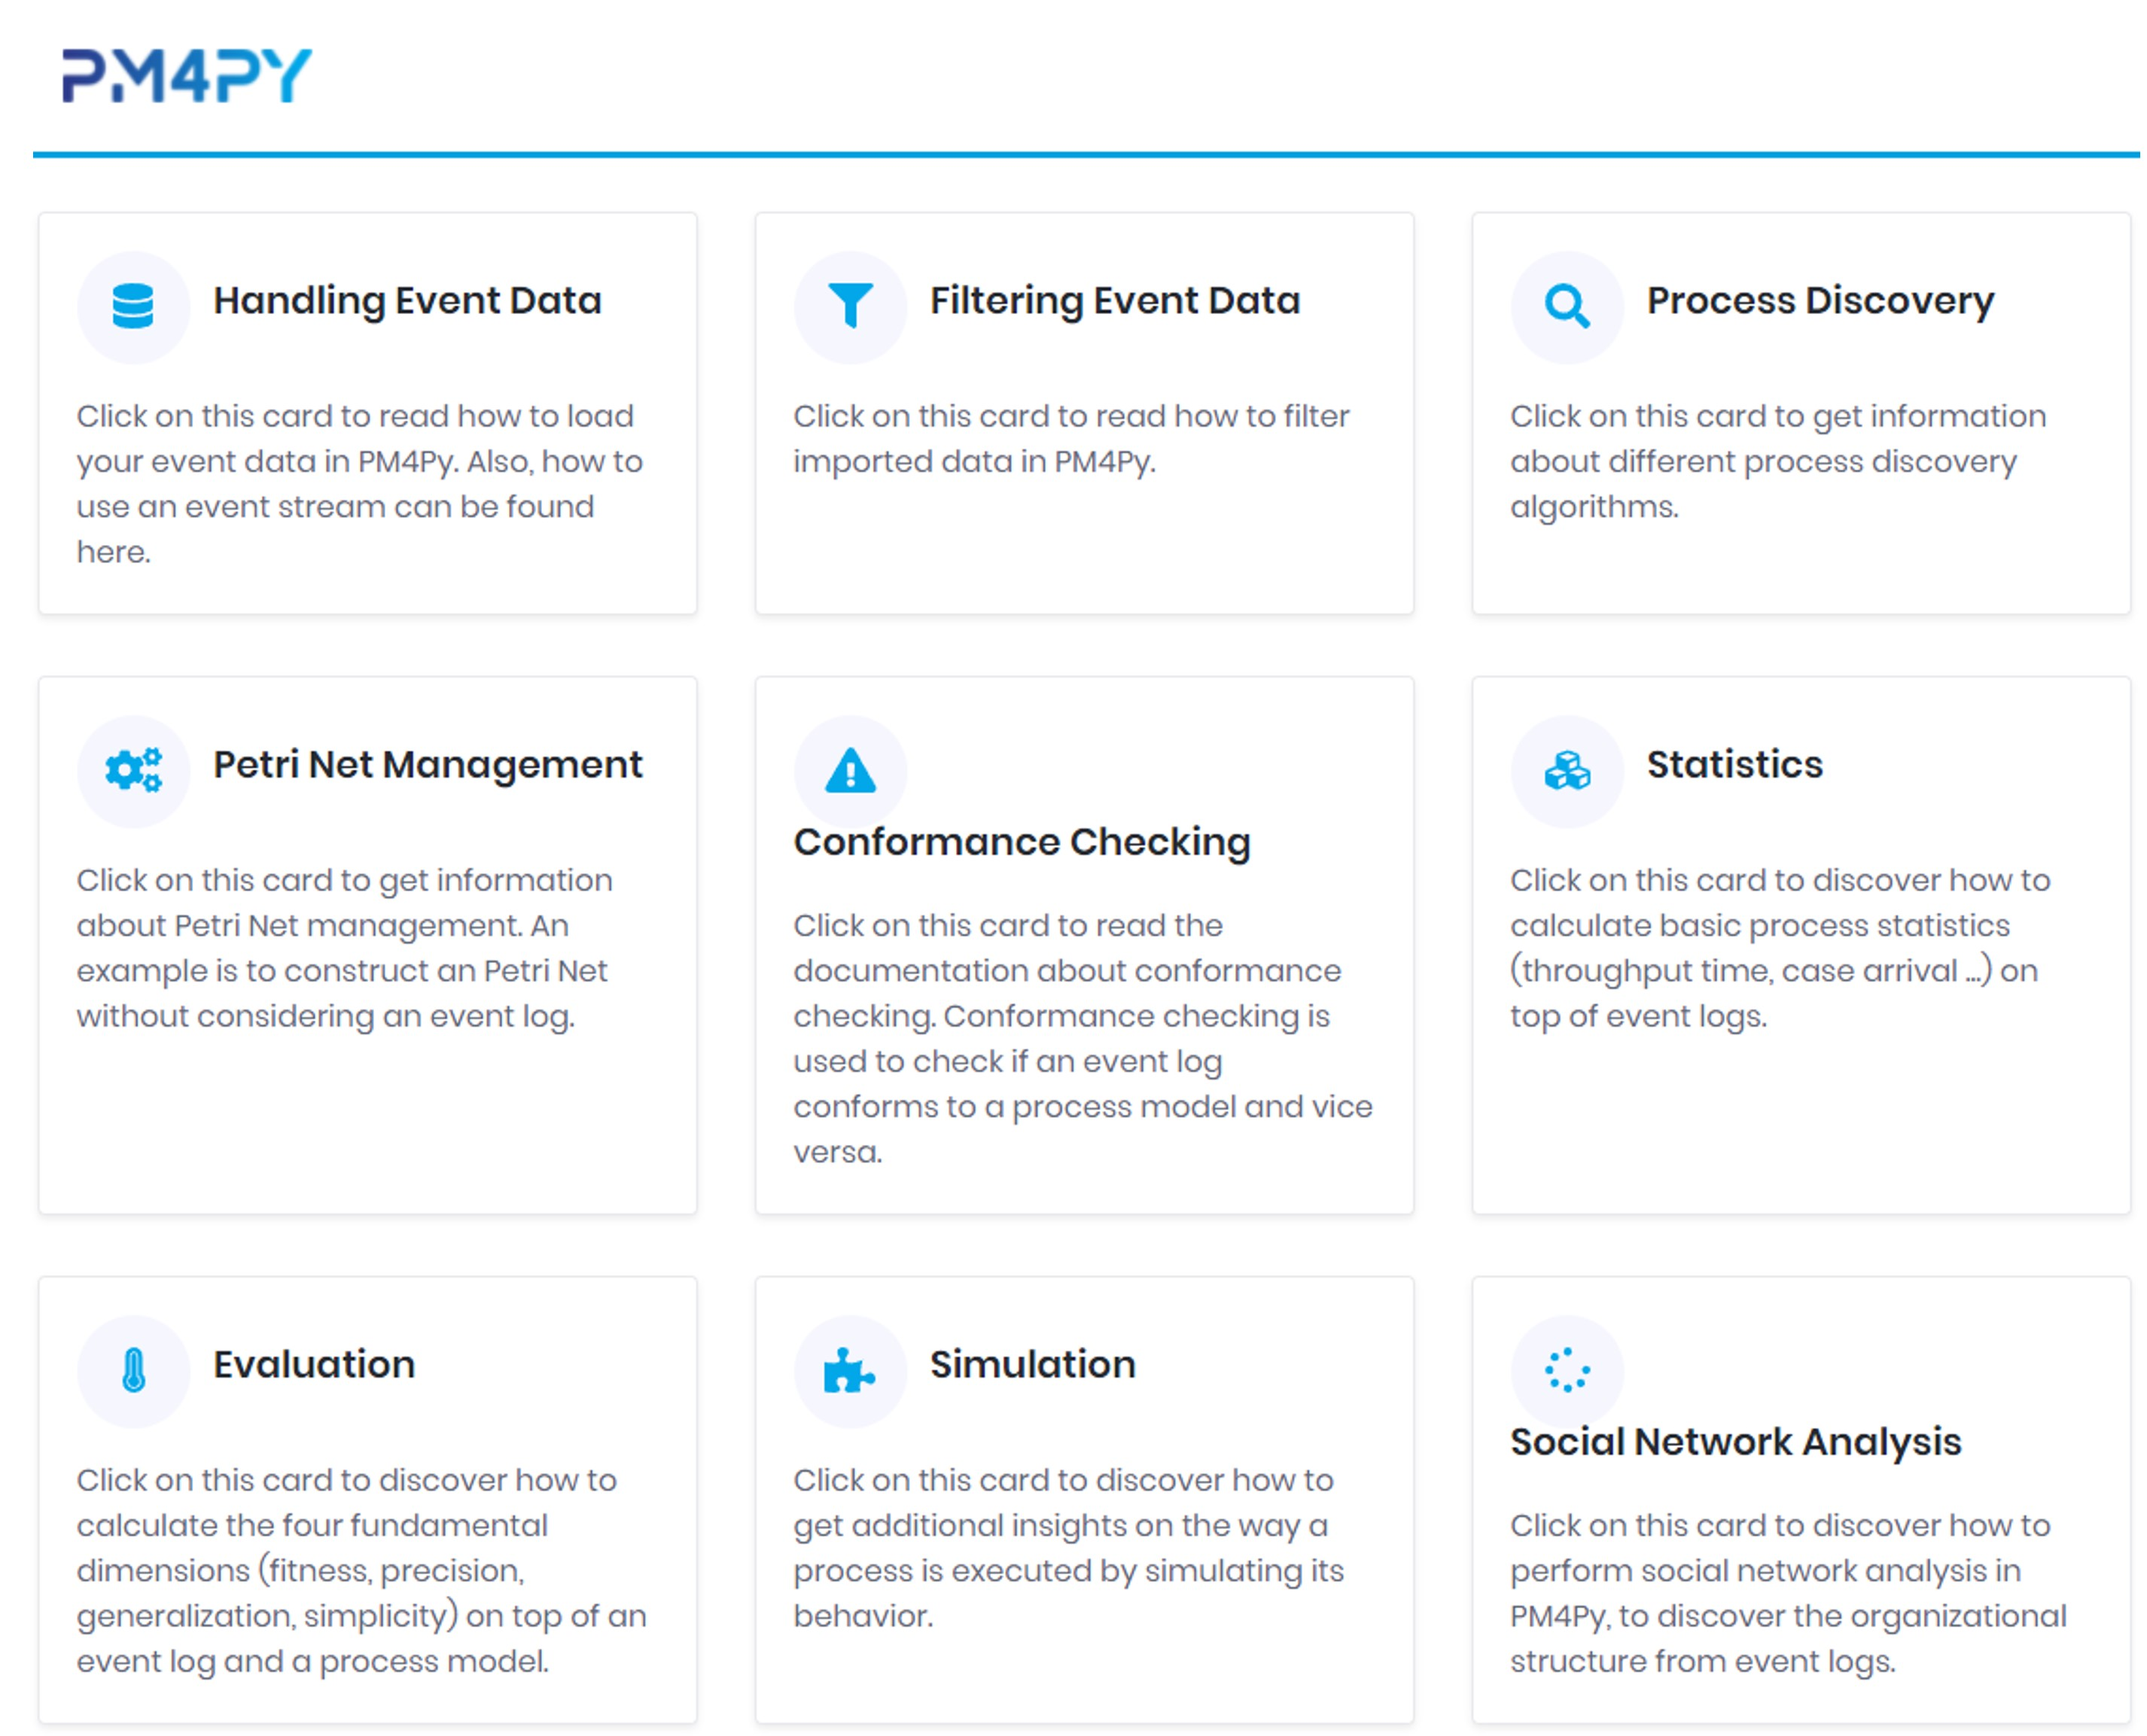

[[공식 사이트](https://pm4py.fit.fraunhofer.de)]
*   pm4py 는 파이썬으로 구현된 프로세스 마이닝 도구 
*   기존의 프로세스 마이닝 기법에 머신러닝 및 딥러닝과 같은 다양한 도구를 유기적으로 활용하기 위해 개발된 도구





In [ ]:
# pm4py 설치
!pip install pm4py

     |████████████████████████████████| 1.5 MB 8.8 MB/s 
     |████████████████████████████████| 40.6 MB 75 kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23594 sha256=3ecb3fb8110403829c30e18dfd07f880a2761c982bec942b98be57192d7a8d42
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [ ]:
# 필요 라이브러리 호출
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
import pandas as pd

from google.colab import drive

In [ ]:
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [ ]:
# 실습용 데이터 호출
init_log = pd.read_csv('/content/gdriv/My Drive/lg실습/data/log.csv')
print(init_log.columns)
print(init_log.iloc[0,:])

Index(['VESSEL', 'CONTAINER_NO', 'MCHN_TP_CD', 'FULL_EMPTY', 'JOB_TYPE', 'POD',
       'BLOCK_BAY', 'JOB_START_DT', 'JOB_END_DT'],
      dtype='object')
VESSEL             CQYH-002/2018
CONTAINER_NO       AKLU6009950-4
MCHN_TP_CD                    QC
FULL_EMPTY                     F
JOB_TYPE             DS-QUAYSIDE
POD                        KRPUS
BLOCK_BAY                  1A-85
JOB_START_DT    2018-01-09 14:25
JOB_END_DT      2018-01-09 14:27
Name: 0, dtype: object




*   pm4py 를 이용해 프로세스 마이닝을 수행하기 위해서는 칼럼명을 다음과 같이 변경해야함

---


*   Case identifer 에 해당하는 칼럼: 'case:concept:name'
*   Activity name 에 해당하는 칼럼: 'concept:name'
*   Originator name 에 해당하는 칼럼: 'org:resource'
*   Teimstamp 에 해당하는 칼럼: 'time:timestamp'





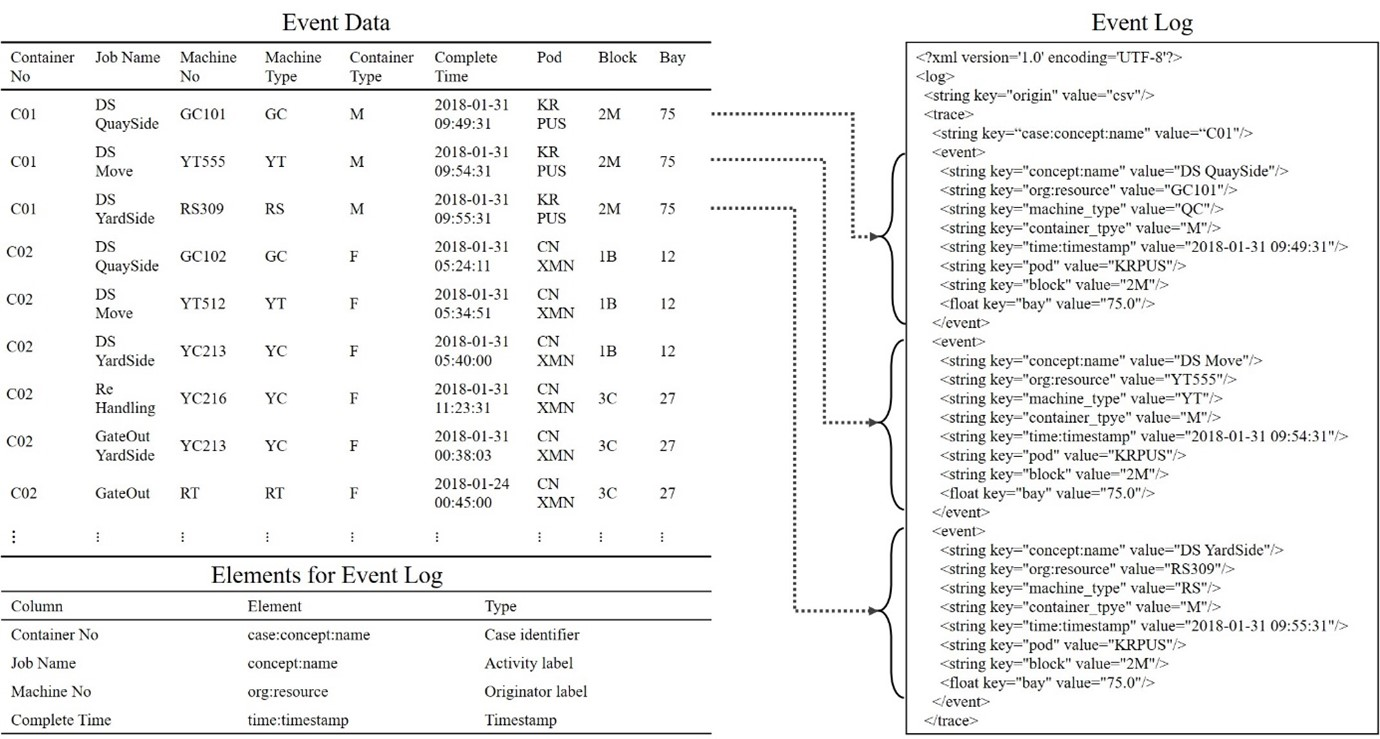

In [ ]:
# 이벤트 로그로 변환하기 위한 Mapping 과정 수행
# case identifer: CONTAINER_NO > case:concept:name
# activity name: JOB_TYPE > concept:name
# resource name: MCHN_TP_CD > org:resource
# time stamp: JOB_END_DT > time:timestamp

columns = ['VESSEL', 'case:concept:name', 'org:resource', 'FULL_EMPTY', 'concept:name', 'POD','BLOCK_BAY', 'JOB_START_DT', 'time:timestamp']
init_log.columns = columns

In [ ]:
# csv 파일을 xml 파일로 변경
log = dataframe_utils.convert_timestamp_columns_in_df(init_log)
log = log.sort_values('time:timestamp')
log = log_converter.apply(log)

In [ ]:
# 호출 된 이벤트 로그 확인
for i in log:
  print(i)

{'attributes': {'concept:name': 'HDMU6694425-2'}, 'events': [{'VESSEL': 'CQYH-001/2018', 'org:resource': 'QC', 'FULL_EMPTY': 'F', 'concept:name': 'DS-QUAYSIDE', 'POD': 'KRPUS', 'BLOCK_BAY': '3B-28', 'JOB_START_DT': Timestamp('2018-01-03 00:08:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2018-01-03 00:10:00+0000', tz='UTC')}, '..', {'VESSEL': 'CQYH-001/2018', 'org:resource': 'TC', 'FULL_EMPTY': 'F', 'concept:name': 'DS-YARDSIDE', 'POD': 'KRPUS', 'BLOCK_BAY': '3B-28', 'JOB_START_DT': Timestamp('2018-01-03 00:16:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2018-01-03 00:18:00+0000', tz='UTC')}]}
{'attributes': {'concept:name': 'HDMU5535590-2'}, 'events': [{'VESSEL': 'CQYH-001/2018', 'org:resource': 'QC', 'FULL_EMPTY': 'F', 'concept:name': 'DS-QUAYSIDE', 'POD': 'KRPUS', 'BLOCK_BAY': '3A-62', 'JOB_START_DT': Timestamp('2018-01-03 00:11:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2018-01-03 00:13:00+0000', tz='UTC')}, '..', {'VESSEL': 'CQYH-001/2018', 'org:resource': 'TC', 'F

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# 데이터 필터링
from pm4py.algo.filtering.log.timestamp import timestamp_filter

# 특정 시점에 모든 이벤트가 포함되는 이벤트 데이터만 필터링
filtered_log = timestamp_filter.filter_traces_contained(log, "2018-01-16 00:00:00", "2018-01-18 00:00:00")

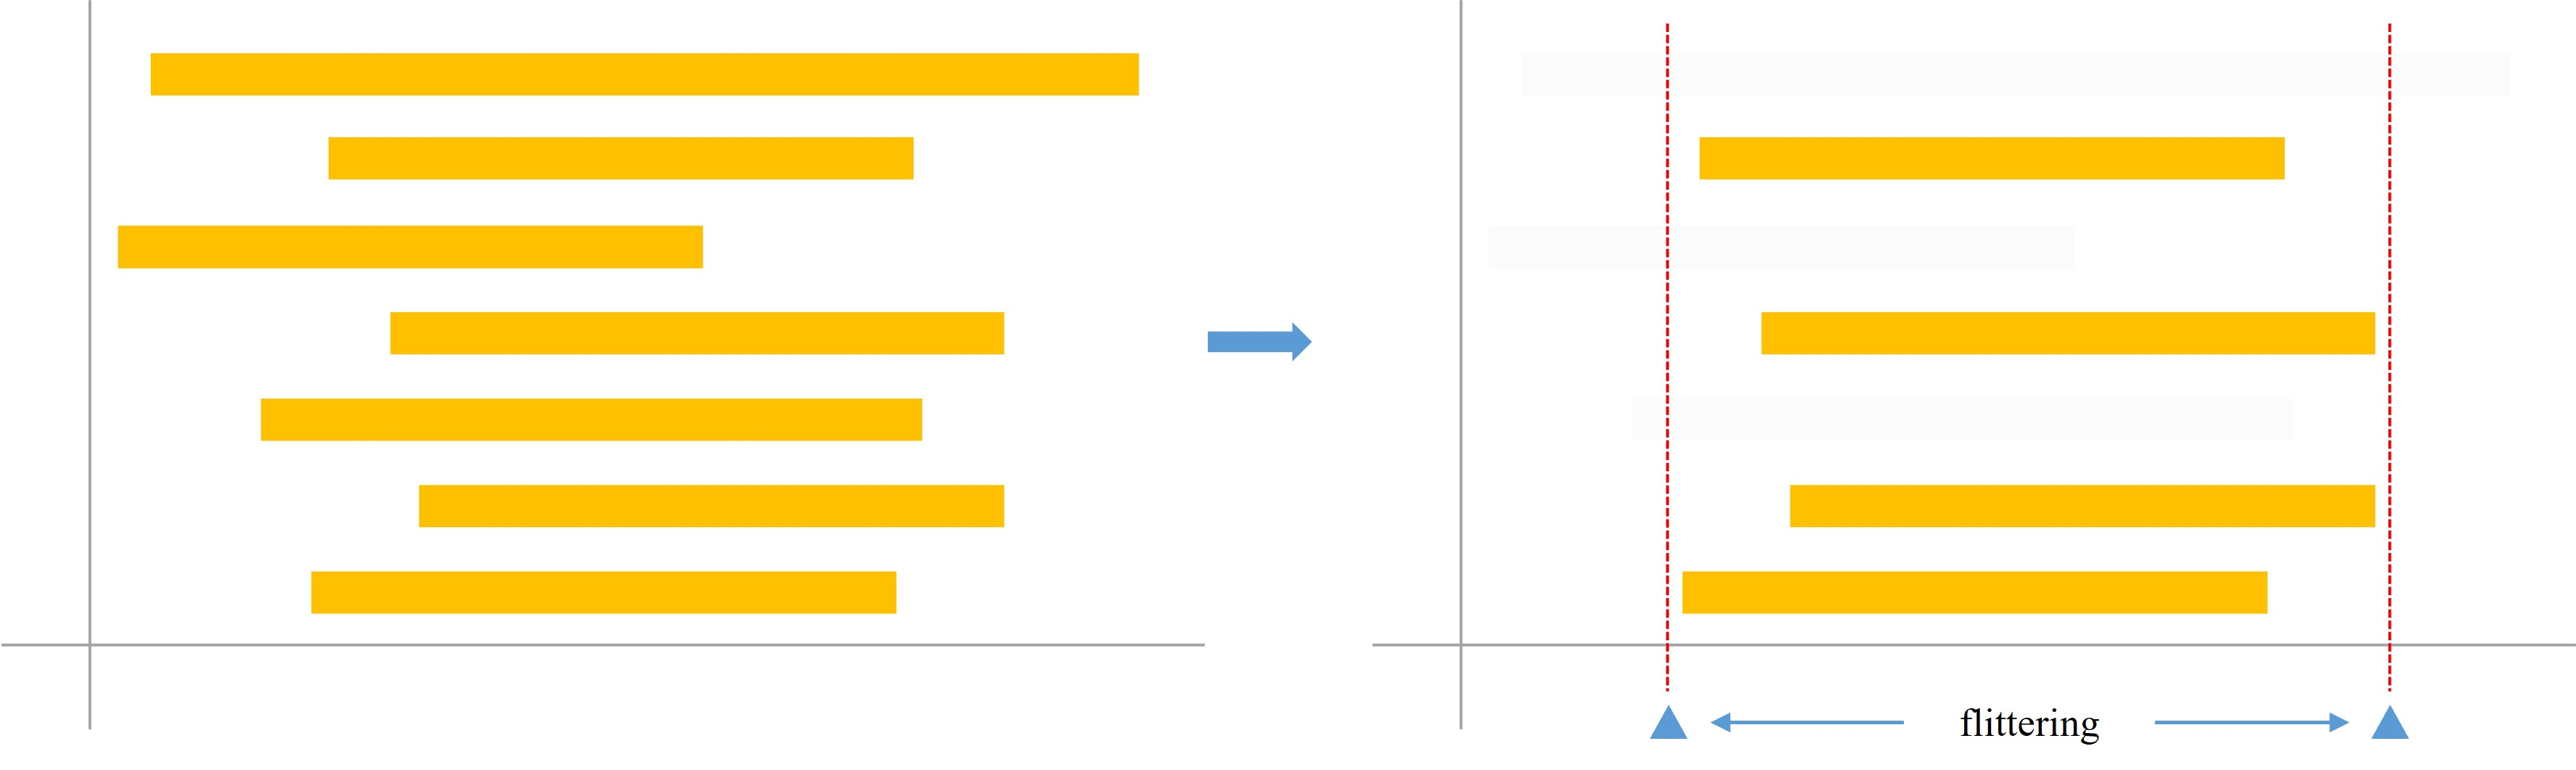

In [ ]:
filtered_log

[{'attributes': {'concept:name': 'MSKU1990794-1'}, 'events': [{'VESSEL': 'ALWV-001/2018', 'org:resource': 'QC', 'FULL_EMPTY': 'F', 'concept:name': 'DS-QUAYSIDE', 'POD': 'KRPUS', 'BLOCK_BAY': '2D-14', 'JOB_START_DT': Timestamp('2018-01-16 09:51:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2018-01-16 09:52:00+0000', tz='UTC'), 'case:concept:name': 'MSKU1990794-1'}, '..', {'VESSEL': 'ALWV-001/2018', 'org:resource': 'TC', 'FULL_EMPTY': 'F', 'concept:name': 'DS-YARDSIDE', 'POD': 'KRPUS', 'BLOCK_BAY': '2D-14', 'JOB_START_DT': Timestamp('2018-01-16 10:01:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2018-01-16 10:03:00+0000', tz='UTC'), 'case:concept:name': 'MSKU1990794-1'}]}, '....', {'attributes': {'concept:name': 'MNBU3046400-1'}, 'events': [{'VESSEL': 'ALWV-001/2018', 'org:resource': 'TC', 'FULL_EMPTY': 'F', 'concept:name': 'LD-YARDSIDE', 'POD': 'RUFPT', 'BLOCK_BAY': '2G-54', 'JOB_START_DT': Timestamp('2018-01-16 14:28:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2018-01-16 

In [ ]:
# 데이터 프레임으로 변환 후 확인
from pm4py.objects.conversion.log import converter as log_converter
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

             VESSEL org:resource  ...            time:timestamp case:concept:name
0     ALWV-001/2018           QC  ... 2018-01-16 09:52:00+00:00     MSKU1990794-1
1     ALWV-001/2018           YT  ... 2018-01-16 10:01:00+00:00     MSKU1990794-1
2     ALWV-001/2018           TC  ... 2018-01-16 10:03:00+00:00     MSKU1990794-1
3     ALWV-001/2018           QC  ... 2018-01-16 09:53:00+00:00     MRKU4054689-1
4     ALWV-001/2018           YT  ... 2018-01-16 10:05:00+00:00     MRKU4054689-1
...             ...          ...  ...                       ...               ...
1174  ALWV-001/2018           YT  ... 2018-01-16 14:38:00+00:00     MRSU3543585-1
1175  ALWV-001/2018           GC  ... 2018-01-16 14:41:00+00:00     MRSU3543585-1
1176  ALWV-001/2018           TC  ... 2018-01-16 14:31:00+00:00     MNBU3046400-1
1177  ALWV-001/2018           YT  ... 2018-01-16 14:32:00+00:00     MNBU3046400-1
1178  ALWV-001/2018           GC  ... 2018-01-16 14:34:00+00:00     MNBU3046400-1

[1179 rows x 9 

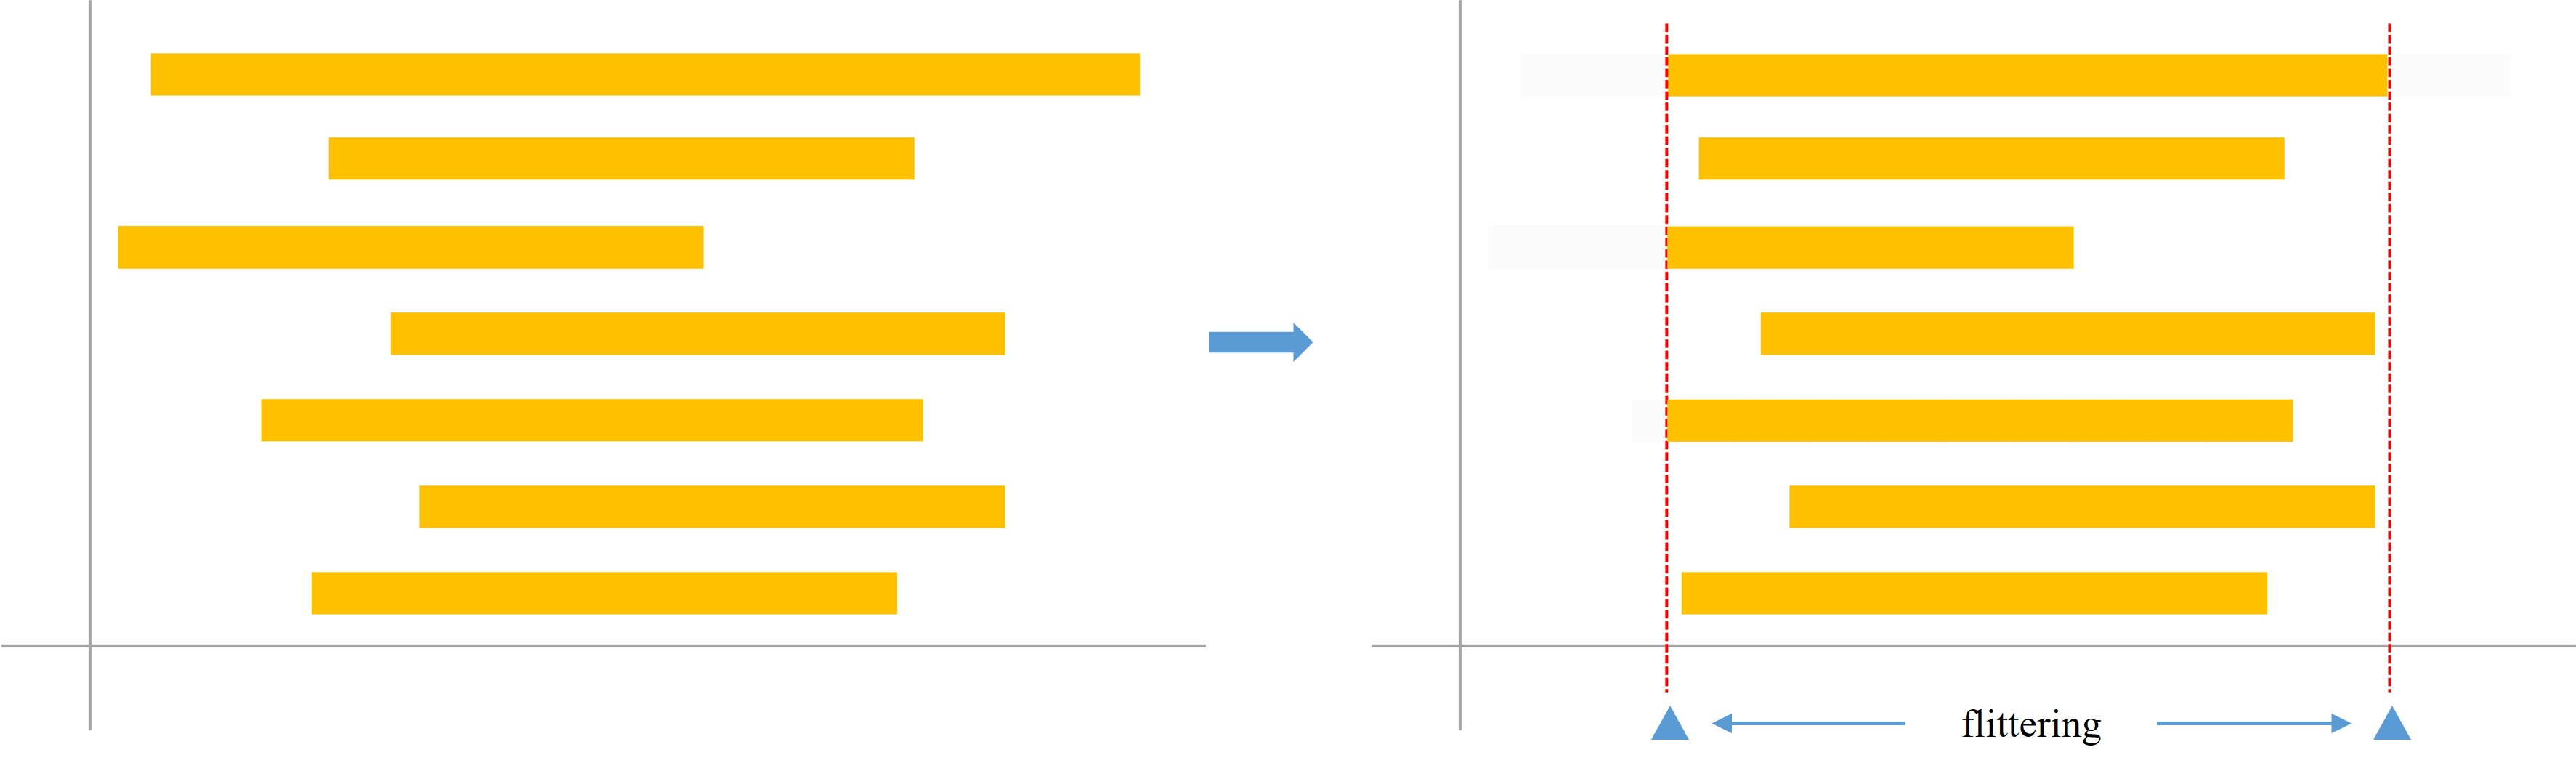

In [ ]:
# 특정 시점 간격내에 포함되어 있는 이벤트 데이터 호출
from pm4py.algo.filtering.log.timestamp import timestamp_filter
filtered_log = timestamp_filter.filter_traces_intersecting(log, "2018-01-16 00:00:00", "2018-01-18 00:00:00")
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

             VESSEL org:resource  ...            time:timestamp case:concept:name
0     ALWV-001/2018           QC  ... 2018-01-16 09:52:00+00:00     MSKU1990794-1
1     ALWV-001/2018           YT  ... 2018-01-16 10:01:00+00:00     MSKU1990794-1
2     ALWV-001/2018           TC  ... 2018-01-16 10:03:00+00:00     MSKU1990794-1
3     ALWV-001/2018           QC  ... 2018-01-16 09:53:00+00:00     MRKU4054689-1
4     ALWV-001/2018           YT  ... 2018-01-16 10:05:00+00:00     MRKU4054689-1
...             ...          ...  ...                       ...               ...
1192  ALWV-001/2018           YT  ... 2018-01-16 14:38:00+00:00     MRSU3543585-1
1193  ALWV-001/2018           GC  ... 2018-01-16 14:41:00+00:00     MRSU3543585-1
1194  ALWV-001/2018           TC  ... 2018-01-16 14:31:00+00:00     MNBU3046400-1
1195  ALWV-001/2018           YT  ... 2018-01-16 14:32:00+00:00     MNBU3046400-1
1196  ALWV-001/2018           GC  ... 2018-01-16 14:34:00+00:00     MNBU3046400-1

[1197 rows x 9 

In [ ]:
print(init_log['concept:name'].value_counts().index)

Index(['LD-MOVE', 'LD-QUAYSIDE', 'LD-YARDSIDE', 'DS-QUAYSIDE', 'DS-MOVE',
       'DS-YARDSIDE'],
      dtype='object')


In [ ]:
# 특정 Activit name으로 시작하는 이벤트 데이터 추출
from pm4py.algo.filtering.log.start_activities import start_activities_filter
log_start = start_activities_filter.get_start_activities(log)
filtered_log = start_activities_filter.apply(log, ["DS-QUAYSIDE"])
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

              VESSEL org:resource  ...            time:timestamp case:concept:name
0      CQYH-001/2018           QC  ... 2018-01-03 00:10:00+00:00     HDMU6694425-2
1      CQYH-001/2018           YT  ... 2018-01-03 00:16:00+00:00     HDMU6694425-2
2      CQYH-001/2018           TC  ... 2018-01-03 00:18:00+00:00     HDMU6694425-2
3      CQYH-001/2018           QC  ... 2018-01-03 00:13:00+00:00     HDMU5535590-2
4      CQYH-001/2018           YT  ... 2018-01-03 00:22:00+00:00     HDMU5535590-2
...              ...          ...  ...                       ...               ...
11164  ALAP-001/2018           YT  ... 2018-01-31 23:13:00+00:00     MSKU4579302-1
11165  ALAP-001/2018           RS  ... 2018-01-31 23:15:00+00:00     MSKU4579302-1
11166  ALAP-001/2018           RS  ... 2018-01-31 23:38:00+00:00     MSKU4579302-1
11167  ALAP-001/2018           YT  ... 2018-01-31 23:48:00+00:00     MSKU4579302-1
11168  ALAP-001/2018           GC  ... 2018-01-31 23:51:00+00:00     MSKU4579302-1

[11

In [ ]:
log_start = start_activities_filter.get_start_activities(log)
filtered_log = start_activities_filter.apply(log, ["LD-YARDSIDE"])
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

              VESSEL org:resource  ...            time:timestamp case:concept:name
0      CQYH-001/2018           TC  ... 2018-01-03 01:24:00+00:00     CXRU1027130-1
1      CQYH-001/2018           YT  ... 2018-01-03 01:34:00+00:00     CXRU1027130-1
2      CQYH-001/2018           GC  ... 2018-01-03 01:36:00+00:00     CXRU1027130-1
3      CQYH-001/2018           TC  ... 2018-01-03 01:29:00+00:00     CXRU1492805-1
4      CQYH-001/2018           YT  ... 2018-01-03 01:32:00+00:00     CXRU1492805-1
...              ...          ...  ...                       ...               ...
13981  ALAP-001/2018           YT  ... 2018-01-31 23:58:00+00:00     MRKU0103907-1
13982  ALAP-001/2018           GC  ... 2018-02-01 00:00:00+00:00     MRKU0103907-1
13983  ALAP-001/2018           TC  ... 2018-01-31 23:58:00+00:00     TCNU2864173-1
13984  ALAP-001/2018           YT  ... 2018-01-31 23:59:00+00:00     TCNU2864173-1
13985  ALAP-001/2018           GC  ... 2018-02-01 00:01:00+00:00     TCNU2864173-1

[13

In [ ]:
# 특정 Activit name으로 종료 이벤트 데이터 추출
from pm4py.algo.filtering.log.end_activities import end_activities_filter
log_start = end_activities_filter.get_end_activities(log)
filtered_log = end_activities_filter.apply(log, ["LD-QUAYSIDE"])
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

              VESSEL org:resource  ...            time:timestamp case:concept:name
0      CQYH-001/2018           TC  ... 2018-01-03 01:24:00+00:00     CXRU1027130-1
1      CQYH-001/2018           YT  ... 2018-01-03 01:34:00+00:00     CXRU1027130-1
2      CQYH-001/2018           GC  ... 2018-01-03 01:36:00+00:00     CXRU1027130-1
3      CQYH-001/2018           TC  ... 2018-01-03 01:29:00+00:00     CXRU1492805-1
4      CQYH-001/2018           YT  ... 2018-01-03 01:32:00+00:00     CXRU1492805-1
...              ...          ...  ...                       ...               ...
14464  ALAP-001/2018           YT  ... 2018-01-31 23:58:00+00:00     MRKU0103907-1
14465  ALAP-001/2018           GC  ... 2018-02-01 00:00:00+00:00     MRKU0103907-1
14466  ALAP-001/2018           TC  ... 2018-01-31 23:58:00+00:00     TCNU2864173-1
14467  ALAP-001/2018           YT  ... 2018-01-31 23:59:00+00:00     TCNU2864173-1
14468  ALAP-001/2018           GC  ... 2018-02-01 00:01:00+00:00     TCNU2864173-1

[14

In [ ]:
# 특정 간격내에 포함된 Case만 추출하는 방법(초단위)
from pm4py.algo.filtering.log.cases import case_filter

filtered_log = case_filter.filter_case_performance(log, 0, 10)
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

Empty DataFrame
Columns: []
Index: []


In [ ]:
filtered_log = case_filter.filter_case_performance(log, 30, 60)
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

           VESSEL org:resource  ...            time:timestamp case:concept:name
0   CQYH-001/2018           TC  ... 2018-01-03 01:39:00+00:00     TEMU9297153-1
1   CQYH-001/2018           YT  ... 2018-01-03 01:39:00+00:00     TEMU9297153-1
2   CQYH-001/2018           GC  ... 2018-01-03 01:40:00+00:00     TEMU9297153-1
3   CONY-001/2018           TC  ... 2018-01-08 23:42:00+00:00     TEMU0440155-4
4   CONY-001/2018           YT  ... 2018-01-08 23:42:00+00:00     TEMU0440155-4
..            ...          ...  ...                       ...               ...
76  ALAP-001/2018           YT  ... 2018-01-31 23:05:00+00:00     MNBU3921609-1
77  ALAP-001/2018           GC  ... 2018-01-31 23:06:00+00:00     MNBU3921609-1
78  ALAP-001/2018           YT  ... 2018-01-31 23:23:00+00:00     MNBU3921342-1
79  ALAP-001/2018           TC  ... 2018-01-31 23:23:00+00:00     MNBU3921342-1
80  ALAP-001/2018           GC  ... 2018-01-31 23:24:00+00:00     MNBU3921342-1

[81 rows x 9 columns]


In [ ]:
filtered_log = case_filter.filter_case_performance(log, 12*3600, 24*3600)
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

          VESSEL org:resource  ...            time:timestamp case:concept:name
0  CMHT-001/2018           QC  ... 2018-01-14 22:14:00+00:00     MRKU0658103-3
1  CMHT-001/2018           YT  ... 2018-01-14 22:21:00+00:00     MRKU0658103-3
2  CMHT-001/2018           TC  ... 2018-01-14 22:23:00+00:00     MRKU0658103-3
3  CMHT-001/2018           TC  ... 2018-01-15 11:38:00+00:00     MRKU0658103-3
4  CMHT-001/2018           YT  ... 2018-01-15 11:53:00+00:00     MRKU0658103-3
5  CMHT-001/2018           GC  ... 2018-01-15 11:56:00+00:00     MRKU0658103-3

[6 rows x 9 columns]


In [ ]:
# 이벤트 Seq length 가 특정 값을 가지는 이벤트 데이터 추출
filtered_log = pm4py.filter_case_size(log, 5, 10)
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

           VESSEL org:resource  ...            time:timestamp case:concept:name
0   CMHT-001/2018           QC  ... 2018-01-14 22:14:00+00:00     MRKU0658103-3
1   CMHT-001/2018           YT  ... 2018-01-14 22:21:00+00:00     MRKU0658103-3
2   CMHT-001/2018           TC  ... 2018-01-14 22:23:00+00:00     MRKU0658103-3
3   CMHT-001/2018           TC  ... 2018-01-15 11:38:00+00:00     MRKU0658103-3
4   CMHT-001/2018           YT  ... 2018-01-15 11:53:00+00:00     MRKU0658103-3
..            ...          ...  ...                       ...               ...
73  ALAP-001/2018           YT  ... 2018-01-31 23:13:00+00:00     MSKU4579302-1
74  ALAP-001/2018           RS  ... 2018-01-31 23:15:00+00:00     MSKU4579302-1
75  ALAP-001/2018           RS  ... 2018-01-31 23:38:00+00:00     MSKU4579302-1
76  ALAP-001/2018           YT  ... 2018-01-31 23:48:00+00:00     MSKU4579302-1
77  ALAP-001/2018           GC  ... 2018-01-31 23:51:00+00:00     MSKU4579302-1

[78 rows x 9 columns]





*   Process Discovery


---



*   alpha miner
*   hueristic miner
*   inductive miner




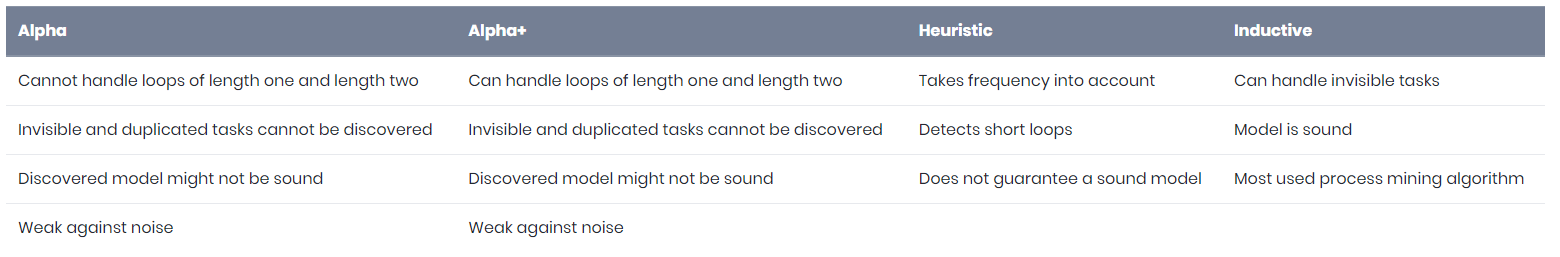

In [ ]:
# alpha miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

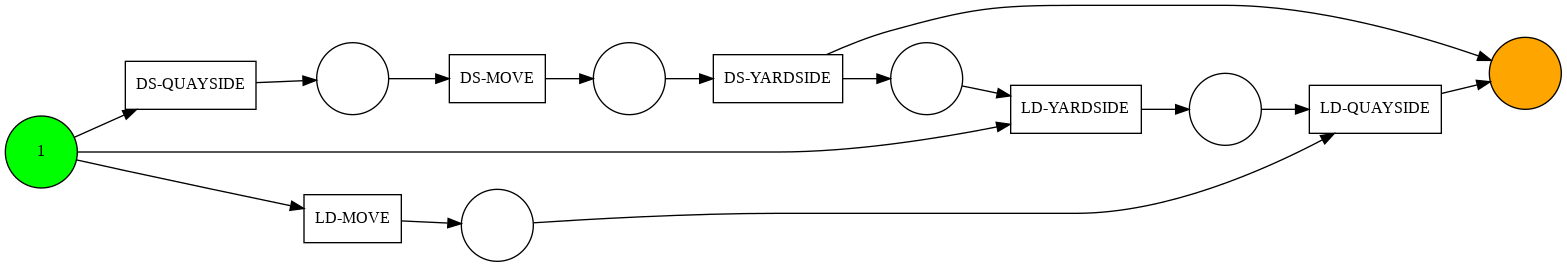

In [ ]:
# 프로세스 모델 시각화
from pm4py.visualization.petri_net import visualizer
gviz = visualizer.apply(net, initial_marking, final_marking)
visualizer.view(gviz)

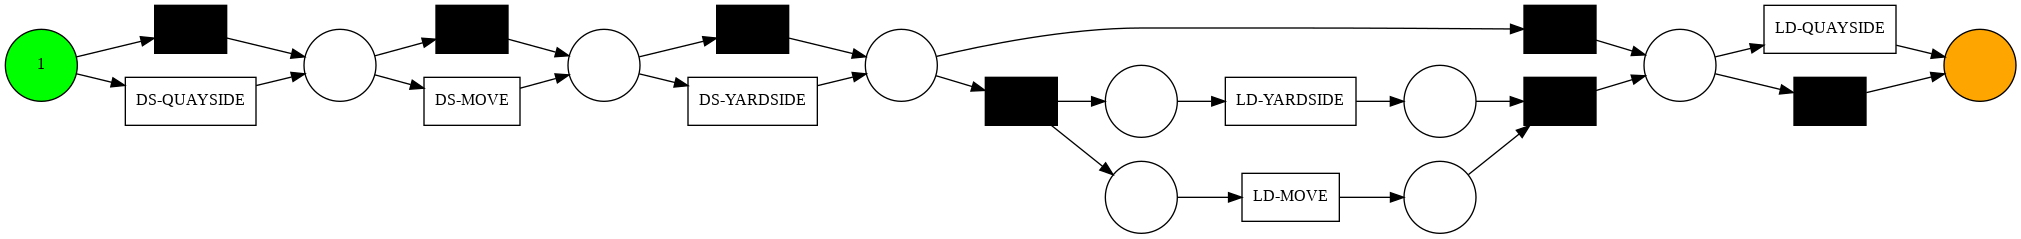

In [ ]:
# petri net 기반의 inductive miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
net, initial_marking, final_marking = inductive_miner.apply(log)
gviz = visualizer.apply(net, initial_marking, final_marking)
visualizer.view(gviz)

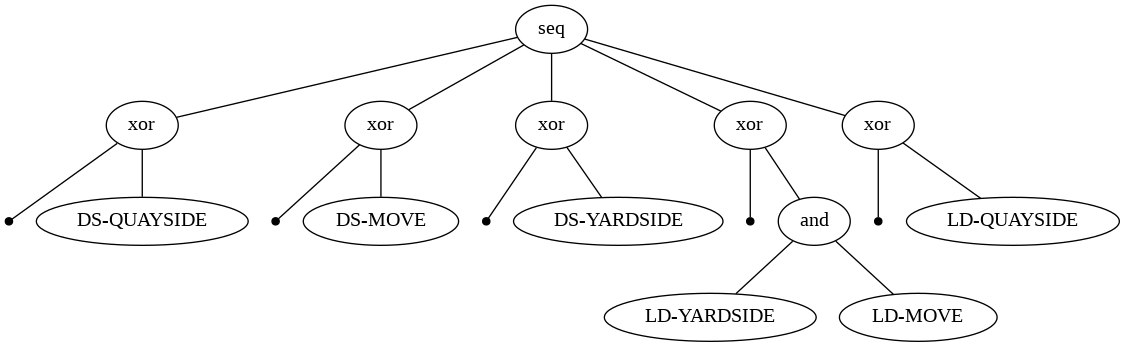

In [ ]:
# 프로세스 트리 기반의 inductive miner

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(log)
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

In [ ]:
# Heuristic miner 
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
print(heu_net)

{'DS-QUAYSIDE': (node:DS-QUAYSIDE connections:{DS-MOVE:[0.9997305308542171]}), 'DS-MOVE': (node:DS-MOVE connections:{DS-YARDSIDE:[0.9997305308542171]}), 'DS-YARDSIDE': (node:DS-YARDSIDE connections:{}), 'LD-YARDSIDE': (node:LD-YARDSIDE connections:{LD-MOVE:[0.9997861420017109]}), 'LD-MOVE': (node:LD-MOVE connections:{LD-QUAYSIDE:[0.9997861420017109]}), 'LD-QUAYSIDE': (node:LD-QUAYSIDE connections:{})}


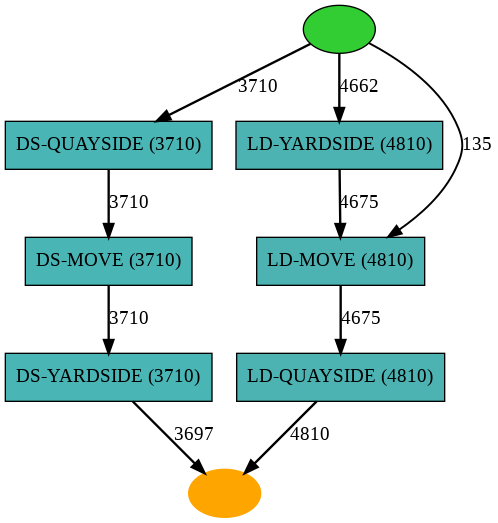

In [ ]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


*   프로세스 모델 품질 척도


---


*   Fitness
*   Precision
*   Generalization
*   Simplicity






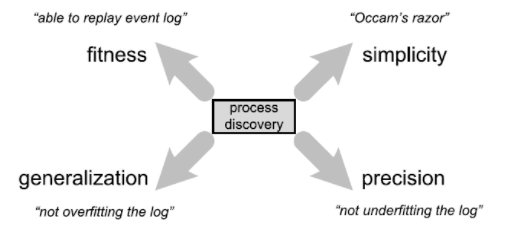



*   프로세스 모델 품질 검증 방법



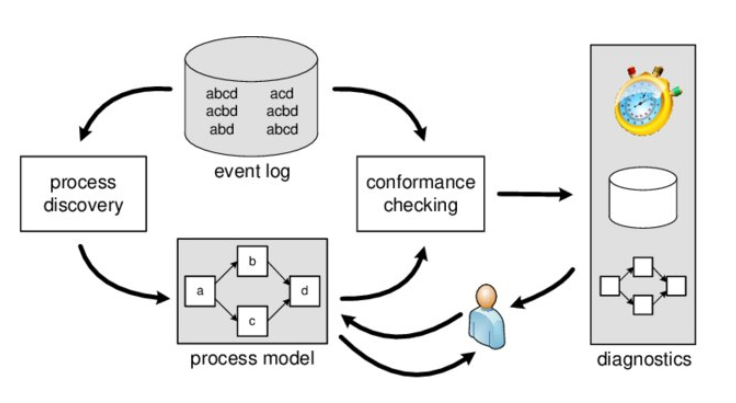

In [ ]:
# fitness
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
net, initial_marking, final_marking = inductive_miner.apply(log)
fitness = replay_fitness_evaluator.apply(log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print(fitness)                      

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


In [ ]:
# precision
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(prec)                                  

replaying log with TBR, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

0.45247685751028255


In [ ]:
# generalization
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(log, net, initial_marking, final_marking)
print(gen)

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

0.9848034729814421


In [ ]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
print(simp)

0.6969696969696969




*   Process Simulation





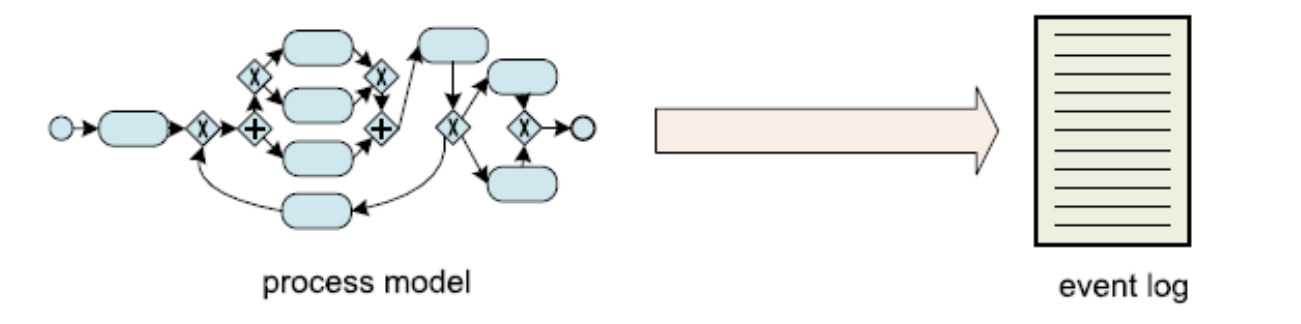

In [ ]:
# 프로세스 모델로부터 가상의 시뮬레이션을 통해 가상의 이벤트 데이터를 생성
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: 50})
dt = log_converter.apply(simulated_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)                                    

    concept:name      time:timestamp case:concept:name
0        DS-MOVE 1970-04-26 17:46:40                 0
1    LD-YARDSIDE 1970-04-26 17:46:41                 0
2        LD-MOVE 1970-04-26 17:46:42                 0
3    DS-QUAYSIDE 1970-04-26 17:46:43                 1
4        DS-MOVE 1970-04-26 17:46:44                 1
..           ...                 ...               ...
127  LD-YARDSIDE 1970-04-26 17:48:47                48
128      LD-MOVE 1970-04-26 17:48:48                48
129  LD-QUAYSIDE 1970-04-26 17:48:49                48
130      LD-MOVE 1970-04-26 17:48:50                49
131  LD-YARDSIDE 1970-04-26 17:48:51                49

[132 rows x 3 columns]
